In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\saiak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data = pd.read_csv("fake_and_real_news.csv")
data.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [4]:
import string
def remove_punc(text):
    clean_text = "".join([char for char in text if char not in string.punctuation])
    return clean_text
data["Text_clean"] = data["Text"].apply(lambda x: remove_punc(x))
data.head()

,Text,label,Text_clean
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...


In [5]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens
data["Text_tokenized"] = data["Text_clean"].apply(lambda x: tokenize(x))
data.head()

,Text,label,Text_clean,Text_tokenized
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him..."
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"[US, conservative, leader, optimistic, of, com..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"[Trump, proposes, US, tax, overhaul, stirs, co..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"[, Court, Forces, Ohio, To, Allow, Millions, O..."
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"[Democrats, say, Trump, agrees, to, work, on, ..."


In [6]:
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]
    return text
data["Text_nonstop"] = data["Text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,Text,label,Text_clean,Text_tokenized,Text_nonstop
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him..."
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"[US, conservative, leader, optimistic, of, com...","[US, conservative, leader, optimistic, common,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"[Trump, proposes, US, tax, overhaul, stirs, co...","[Trump, proposes, US, tax, overhaul, stirs, co..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"[, Court, Forces, Ohio, To, Allow, Millions, O...","[, Court, Forces, Ohio, To, Allow, Millions, O..."
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"[Democrats, say, Trump, agrees, to, work, on, ...","[Democrats, say, Trump, agrees, work, immigrat..."


In [7]:
ps = nltk.PorterStemmer()
def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["Text_stemmed"] = data["Text_nonstop"].apply(lambda x: stemming(x))
data.head()

,Text,label,Text_clean,Text_tokenized,Text_nonstop,Text_stemmed
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, top, trump, surrog, brutal, stab, him, in, ..."
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"[US, conservative, leader, optimistic, of, com...","[US, conservative, leader, optimistic, common,...","[us, conserv, leader, optimist, common, ground..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"[Trump, proposes, US, tax, overhaul, stirs, co...","[Trump, proposes, US, tax, overhaul, stirs, co...","[trump, propos, us, tax, overhaul, stir, conce..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"[, Court, Forces, Ohio, To, Allow, Millions, O...","[, Court, Forces, Ohio, To, Allow, Millions, O...","[, court, forc, ohio, to, allow, million, of, ..."
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"[Democrats, say, Trump, agrees, to, work, on, ...","[Democrats, say, Trump, agrees, work, immigrat...","[democrat, say, trump, agre, work, immigr, bil..."


In [8]:
wn = nltk.WordNetLemmatizer()
def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text
data["Text_lemmatized"] = data["Text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,Text,label,Text_clean,Text_tokenized,Text_nonstop,Text_stemmed,Text_lemmatized
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, top, trump, surrog, brutal, stab, him, in, ...","[, top, trump, surrog, brutal, stab, him, in, ..."
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"[US, conservative, leader, optimistic, of, com...","[US, conservative, leader, optimistic, common,...","[us, conserv, leader, optimist, common, ground...","[u, conserv, leader, optimist, common, ground,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"[Trump, proposes, US, tax, overhaul, stirs, co...","[Trump, proposes, US, tax, overhaul, stirs, co...","[trump, propos, us, tax, overhaul, stir, conce...","[trump, propos, u, tax, overhaul, stir, concer..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"[, Court, Forces, Ohio, To, Allow, Millions, O...","[, Court, Forces, Ohio, To, Allow, Millions, O...","[, court, forc, ohio, to, allow, million, of, ...","[, court, forc, ohio, to, allow, million, of, ..."
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"[Democrats, say, Trump, agrees, to, work, on, ...","[Democrats, say, Trump, agrees, work, immigrat...","[democrat, say, trump, agre, work, immigr, bil...","[democrat, say, trump, agre, work, immigr, bil..."


In [9]:
data.to_csv("fake_and_real_news_cleaned.csv", sep=',')
data.head()

,Text,label,Text_clean,Text_tokenized,Text_nonstop,Text_stemmed,Text_lemmatized
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, Top, Trump, Surrogate, BRUTALLY, Stabs, Him...","[, top, trump, surrog, brutal, stab, him, in, ...","[, top, trump, surrog, brutal, stab, him, in, ..."
1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"[US, conservative, leader, optimistic, of, com...","[US, conservative, leader, optimistic, common,...","[us, conserv, leader, optimist, common, ground...","[u, conserv, leader, optimist, common, ground,..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"[Trump, proposes, US, tax, overhaul, stirs, co...","[Trump, proposes, US, tax, overhaul, stirs, co...","[trump, propos, us, tax, overhaul, stir, conce...","[trump, propos, u, tax, overhaul, stir, concer..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"[, Court, Forces, Ohio, To, Allow, Millions, O...","[, Court, Forces, Ohio, To, Allow, Millions, O...","[, court, forc, ohio, to, allow, million, of, ...","[, court, forc, ohio, to, allow, million, of, ..."
4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"[Democrats, say, Trump, agrees, to, work, on, ...","[Democrats, say, Trump, agrees, work, immigrat...","[democrat, say, trump, agre, work, immigr, bil...","[democrat, say, trump, agre, work, immigr, bil..."


In [10]:
info=pd.read_csv("fake_and_real_news_cleaned.csv")
info.head()

,Unnamed: 0,Text,label,Text_clean,Text_tokenized,Text_nonstop,Text_stemmed,Text_lemmatized
0,0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,Top Trump Surrogate BRUTALLY Stabs Him In The...,"['', 'Top', 'Trump', 'Surrogate', 'BRUTALLY', ...","['', 'Top', 'Trump', 'Surrogate', 'BRUTALLY', ...","['', 'top', 'trump', 'surrog', 'brutal', 'stab...","['', 'top', 'trump', 'surrog', 'brutal', 'stab..."
1,1,U.S. conservative leader optimistic of common ...,Real,US conservative leader optimistic of common gr...,"['US', 'conservative', 'leader', 'optimistic',...","['US', 'conservative', 'leader', 'optimistic',...","['us', 'conserv', 'leader', 'optimist', 'commo...","['u', 'conserv', 'leader', 'optimist', 'common..."
2,2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,Trump proposes US tax overhaul stirs concerns ...,"['Trump', 'proposes', 'US', 'tax', 'overhaul',...","['Trump', 'proposes', 'US', 'tax', 'overhaul',...","['trump', 'propos', 'us', 'tax', 'overhaul', '...","['trump', 'propos', 'u', 'tax', 'overhaul', 's..."
3,3,Court Forces Ohio To Allow Millions Of Illega...,Fake,Court Forces Ohio To Allow Millions Of Illega...,"['', 'Court', 'Forces', 'Ohio', 'To', 'Allow',...","['', 'Court', 'Forces', 'Ohio', 'To', 'Allow',...","['', 'court', 'forc', 'ohio', 'to', 'allow', '...","['', 'court', 'forc', 'ohio', 'to', 'allow', '..."
4,4,Democrats say Trump agrees to work on immigrat...,Real,Democrats say Trump agrees to work on immigrat...,"['Democrats', 'say', 'Trump', 'agrees', 'to', ...","['Democrats', 'say', 'Trump', 'agrees', 'work'...","['democrat', 'say', 'trump', 'agre', 'work', '...","['democrat', 'say', 'trump', 'agre', 'work', '..."


In [11]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()
data = pd.read_csv("fake_and_real_news.csv", sep=',')
data.columns = ['Text', 'label']

In [12]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(analyzer=clean_text)
x_count = count.fit_transform(data["Text"])

In [14]:
x_count_df = pd.DataFrame(x_count.toarray(), columns=count.get_feature_names_out())
x_count_df.head(10)

,,0,000,0000,000063sz,00007,0005,0009,001,0019,...,zyklon,zypri,zyri,zz,zzbluecomet,zztain,zzzzaaaacccchhh,zzzzzzzzzzzzz,émigré,ツ
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['Text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names_out())

(9900, 75982)
['' '0' '000' ... 'zzzzzzzzzzzzz' 'émigré' 'ツ']


In [17]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names_out())
X_tfidf_df.head(10)

,,0,000,0000,000063sz,00007,0005,0009,001,0019,...,zyklon,zypri,zyri,zz,zzbluecomet,zztain,zzzzaaaacccchhh,zzzzzzzzzzzzz,émigré,ツ
0,0.018015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.005510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.010494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.009389,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.013752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.019596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.007907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.011948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.031805,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

                  0  000  0000  000063sz  00007  0005  0009  001  0019  ...  \
0     0.018015  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
1     0.026349  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
2     0.005510  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
3     0.010494  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
4     0.009389  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
...        ...  ...  ...   ...       ...    ...   ...   ...  ...   ...  ...   
9895  0.009113  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
9896  0.013240  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
9897  0.006506  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
9898  0.009258  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   
9899  0.004259  0.0  0.0   0.0       0.0    0.0   0.0   0.0  0.0   0.0  ...   

      zyklon  zypri  zyri   zz  zzbluecomet  zztain

In [19]:
import string

data['Len'] = data['Text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['Text'].apply(lambda x: count_punct(x))

data.head()

,Text,label,Len,punct%
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,1265,2.8
1,U.S. conservative leader optimistic of common ...,Real,641,2.7
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,5162,3.1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,1901,2.8
4,Democrats say Trump agrees to work on immigrat...,Real,3154,2.2


C:\Users\saiak\anaconda3\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


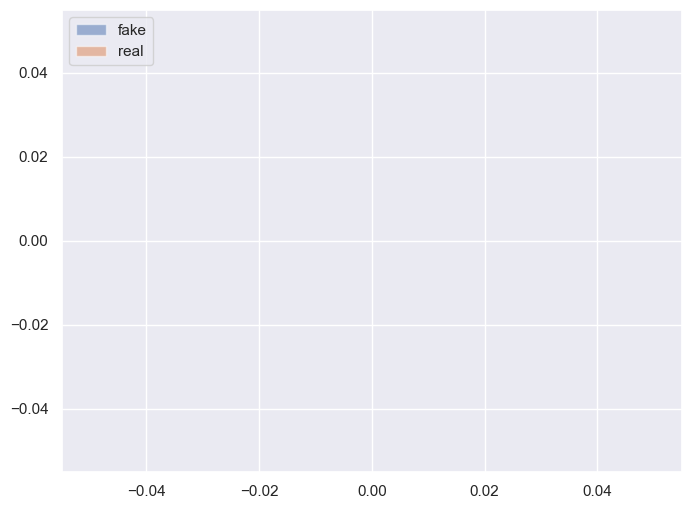

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='fake']['Len'], bins, alpha=0.5, density=True, label='fake')
plt.hist(data[data['label']=='real']['Len'], bins, alpha=0.5, density=True, label='real')
plt.legend(loc='upper left')
plt.show()

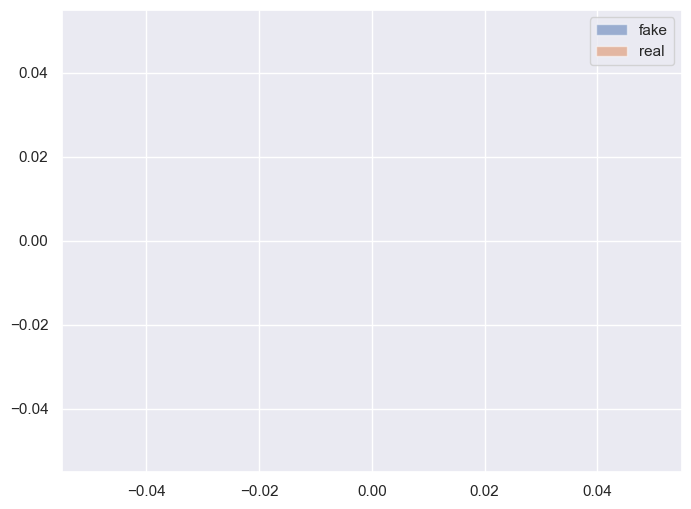

In [21]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='fake']['punct%'], bins, alpha=0.5, density=True, label='fake')
plt.hist(data[data['label']=='real']['punct%'], bins, alpha=0.5, density=True, label='real')
plt.legend(loc='upper right')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X=data[['Text', 'Len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=101)

In [27]:
X_train.head()

,Text,Len,punct%
7277,Texas 'bathroom bill' dies in special legislat...,2158,2.8
8696,Senate Democrats demand that Sessions testify ...,2729,2.3
8789,Trump tax overhaul under intensifying fire as ...,4258,2.5
8522,Senators demand investigation of reports of to...,1427,2.9
1565,WATCH: Wounded Vet Tells Trump To Start Actin...,2382,2.5


In [28]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['Text'])

tfidf_train = tfidf_vect_fit.transform(X_train['Text'])
tfidf_test = tfidf_vect_fit.transform(X_test['Text'])

X_train_vect = pd.concat([X_train[['Len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['Len', 'punct%']].reset_index(drop=True),
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,Len,punct%,0,1,2,3,4,5,6,7,...,62921,62922,62923,62924,62925,62926,62927,62928,62929,62930
0,2158,2.8,0.011476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2729,2.3,0.010161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4258,2.5,0.006577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1427,2.9,0.012764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2382,2.5,0.011729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

rf = RandomForestClassifier(n_estimators=150, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)
y_pred = rf_model.predict(X_test_vect)

In [31]:
X_train_vect=X_train_vect.drop('Len', axis=1)
X_train_vect=X_train_vect.drop('punct%', axis=1)
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,62921,62922,62923,62924,62925,62926,62927,62928,62929,62930
0,0.011476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.010161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.012764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.011729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='Fake', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))


print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Precision: 0.991 / Recall: 0.999 / F1-Score: 0.995 / Accuracy: 99.515%
              precision    recall  f1-score   support

        Fake       0.99      1.00      1.00      1276
        Real       1.00      0.99      0.99      1199

    accuracy                           1.00      2475
   macro avg       1.00      1.00      1.00      2475
weighted avg       1.00      1.00      1.00      2475

[[1275    1]
 [  11 1188]]
